# Unsupervised Learning and More Supervised Learning


## 1

### [35 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of classifiers on 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

**(b)** Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering

**(c)** For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

**ANSWER**

(a)

In [879]:
from scipy.spatial.distance import cdist
import numpy as np


class Kmeans:
    '''
    Parameters
    ---------------------------------
    X : array
        input data for clustering
    k : int
        the number of centroids
    converge : float
        the difference between cost function, determines stopping point
    random_seed: int
        set random seed for reproducible identical results
    ---------------------------------
    pseudo code to implement kmeans clustering
    Select K centroid among input as initial centroids 
    assign all points to the nearest centroid
    recalculate centroids
    minimize cost function till converge
    output class label
    '''

    def __init__(self, k, converge=1e-6, random_seed=0):
        self.k = k
        self.converge = converge
        self.random_seed = random_seed

    def fit(self, X):
        np.random.seed(self.random_seed)
        # initiate random centroids
        row, col = X.shape
        centroids = X[np.random.choice(row, self.k, replace=False)]
        # calculate the dist of each points in X with centroid
        delta = np.inf
        cost = np.inf
        while delta > self.converge:
            # calculate the dist of each points in X with centroid
            dist = cdist(X, centroids)
            nearest_centroid_idx = np.argmin(dist, axis=1)
            # calculate new centroids
            centroids = np.array(
                [np.mean(X[nearest_centroid_idx == i], axis=0) for i in range(self.k)])
            # calculate cost
            new_cost = dist[np.arange(len(dist)), nearest_centroid_idx].sum()
            delta = cost - new_cost
            cost = new_cost
            self.inertia = new_cost
            self.cluster_label = nearest_centroid_idx
        return self

In [823]:
from sklearn.datasets import make_blobs
X2b, y2b = make_blobs(n_samples=100, centers=2)
X5b, y5b = make_blobs(n_samples=100, centers=5)

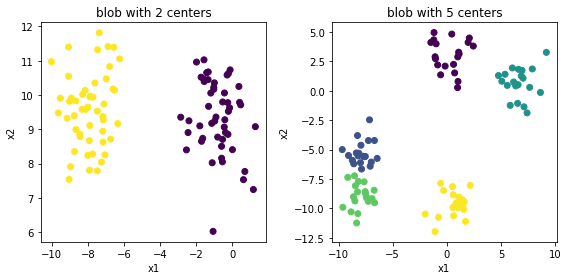

In [880]:
# inspect the result
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X2b[:, 0], X2b[:, 1], c=Kmeans(k=2).fit(X2b).cluster_label)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('blob with 2 centers')
plt.subplot(1, 2, 2)
plt.scatter(X5b[:, 0], X5b[:, 1], c=Kmeans(k=5).fit(X5b).cluster_label)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('blob with 5 centers')
plt.tight_layout()

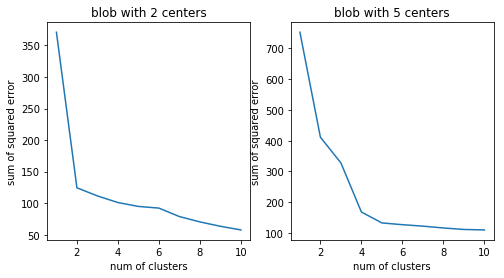

In [881]:
# plot elbow
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sses2 = []
for i in range(1, 11):
    sses2.append(Kmeans(k=i).fit(X2b).inertia)
plt.plot(range(1, 11), sses2)
plt.xlabel('num of clusters')
plt.ylabel('sum of squared error')
plt.title('blob with 2 centers')
plt.subplot(1, 2, 2)
sses5 = []
for i in range(1, 11):
    sses5.append(Kmeans(k=i).fit(X5b).inertia)
plt.plot(range(1, 11), sses5)
plt.xlabel('num of clusters')
plt.ylabel('sum of squared error')
plt.title('blob with 5 centers')

The elbow for the first datasets is at 2 clusters and for the second datasets is at 5 clusters.
This is because 2 and 5 described the natural clustering of the dataset, before reaching them one could always significantly imporve the sum of squared error, however, further increase the number would only in a diminishing return of sum of squared error.

(b)  
**K-means**: prototype-based complete partitional clustering. It finds a user-specified number of clusters k which are represented by their centroids. It requires choosing k in advance and excels with clusters of equal variances, struggles in situations with variation in cluster variance or correlation between features. 

**agglometrative clustering**: A "bottom-up" approach where each observation starts in its own cluster, and pairs of clusters are merged based on dissimilarity and linkage criteria until there is only one cluster. It won't divide uniformed distributed data into clustered where clusters don't exist.

**GMM** : Without assuming the clusters are Gaussians centered at the mean each with identical covariance matrices, we use a weighted average of density functions, to maximize the likelihood of the data given the model and pick the cluster that each data point was most likely to come from. It excels when there are correlations between features.

**DBSCAN**: density-based partial clustering. By using distance measure, radius of a neighbor and minPts Points in low-density area omitted as noise.

**spectral clustering**: It uses the spectrum (eigenvalues) of the similarity matrix of the data to perform dimensionality reduction before clustering. It requires choosing number of clusters, makes little assumptions, yet can be slow for large dataset.

(c)

In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# clustering libraries
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [883]:
aggregation = pd.read_csv('data/Aggregation.txt', sep='\t',
                          names=['x1', 'x2'], header=None, index_col=False)
compound = pd.read_csv('data/Compound.txt', sep='\t',
                       names=['x1', 'x2'], header=None, index_col=False)
d31 = pd.read_csv('data/D31.txt', sep='\t',
                  names=['x1', 'x2'], header=None, index_col=False)
jain = pd.read_csv('data/jain.txt', sep='\t',
                   names=['x1', 'x2'], header=None, index_col=False)

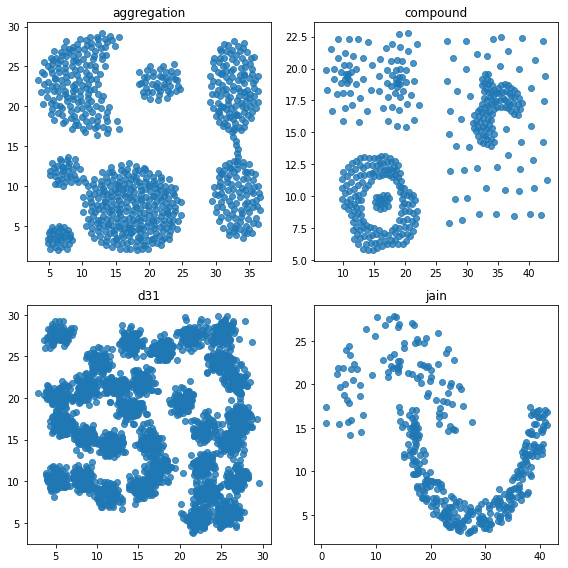

In [887]:
# check how the original datasets look like, apply alpha to get a sense of density
plt.figure(figsize=(8,8))
plt.subplot(2, 2, 1)
plt.scatter(aggregation.iloc[:, 0], aggregation.iloc[:, 1],alpha=0.8)
plt.title('aggregation')
plt.subplot(2, 2, 2)
plt.scatter(compound.iloc[:, 0], compound.iloc[:, 1],alpha=0.8)
plt.title('compound')
plt.subplot(2, 2, 3)
plt.scatter(d31.iloc[:, 0], d31.iloc[:, 1],alpha=0.8)
plt.title('d31')
plt.subplot(2, 2, 4)
plt.scatter(jain.iloc[:, 0], jain.iloc[:, 1],alpha=0.8)
plt.title('jain')
plt.tight_layout()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


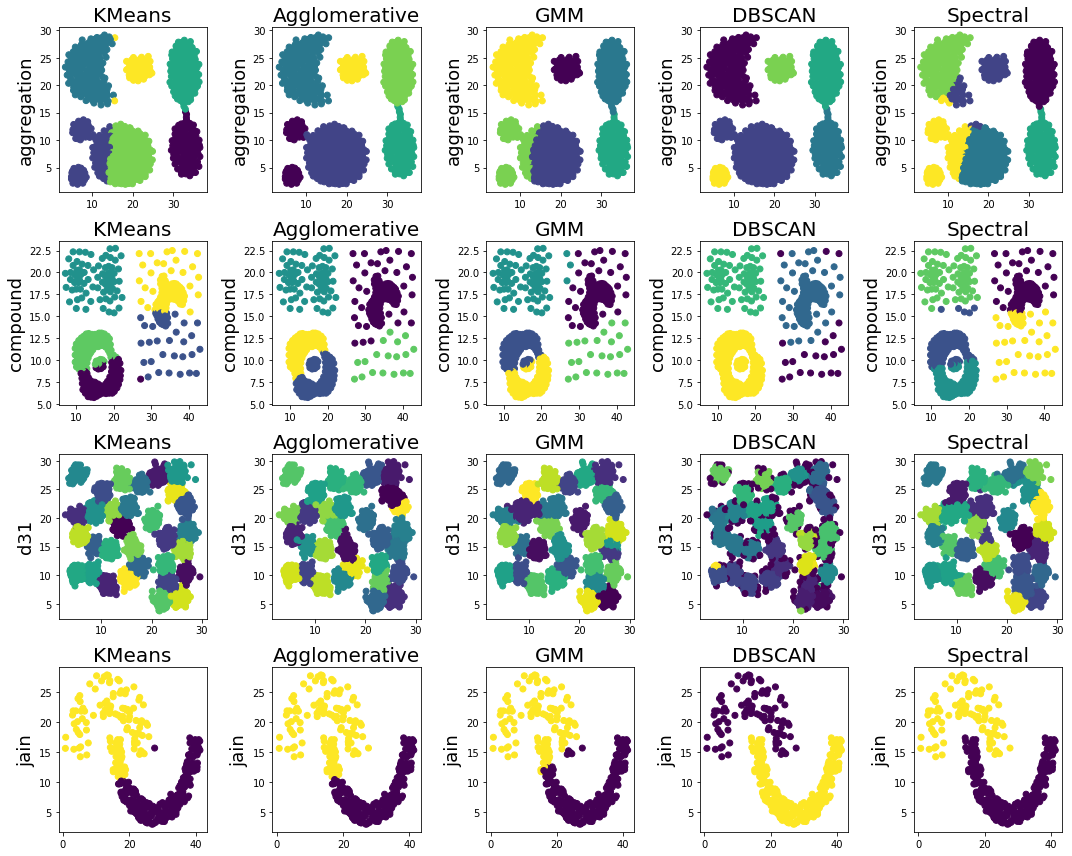

In [388]:
# list of dataframes with parameters tuned based on inital coutour and final output
df_lst = [(("aggregation", aggregation),
           {'KMeans': {'n_clusters': 6},
            "Agglomerative": {'n_clusters': 6, 'linkage': 'average'},
            "GMM": {'n_components': 6},
            "DBSCAN": {'eps': 0.2, 'min_samples': 10},
            "Spectral": {'n_clusters': 6, 'n_neighbors': 5}}),
          (("compound", compound),
           {'KMeans': {'n_clusters': 5},
            "Agglomerative": {'n_clusters': 5},
            "GMM": {'n_components': 5},
            "DBSCAN": {'eps': 0.5, 'min_samples': 19},
            "Spectral": {'n_clusters': 5, 'n_neighbors': 5}}),
          (("d31", d31),
           {'KMeans': {'n_clusters': 31},
            "Agglomerative": {'n_clusters': 31},
            "GMM": {'n_components': 31},
            "DBSCAN": {'eps': 0.06, 'min_samples': 3},
            "Spectral": {'n_clusters': 31, 'n_neighbors': 5}}),
          (("jain", jain),
           {'KMeans': {'n_clusters': 2},
            "Agglomerative": {'n_clusters': 2},
            "GMM": {'n_components': 2, 'covariance_type':'tied'},
            "DBSCAN": {'eps': 0.31, 'min_samples': 15},
            "Spectral": {'n_clusters': 2, 'n_neighbors': 5, 'affinity': 'nearest_neighbors'}})]

# dictionary of clustering methods
clt_lst = {'KMeans': KMeans,
           "Agglomerative": AgglomerativeClustering,
           'GMM': GaussianMixture,
           "DBSCAN": DBSCAN,
           "Spectral": SpectralClustering}

# set up grid for plotting
fig, ax = plt.subplots(len(df_lst), len(clt_lst), figsize=(15, 12))
x = 0

# loop through datasets and apply customized parameter
for ((df_name, df), params) in df_lst:
    # scale all dataframe for the sake of distance measures
    df_scaled = StandardScaler().fit_transform(df)
    # loop through clustering methods
    for clt_name, clt in clt_lst.items():
        x += 1
        # GaussianMixture doesn't have fit_predict method
        if clt_name == 'GMM':
            df_clt = clt(**params[clt_name]).fit(df_scaled).predict(df_scaled)
        else:
            df_clt = clt(**params[clt_name]).fit_predict(df_scaled)
        plt.subplot(len(df_lst), len(clt_lst), x)
        plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df_clt)
        plt.ylabel(df_name, fontsize=18)
        plt.title(clt_name, fontsize=20)
        plt.tight_layout()

for aggregation data with connected ellipses and irregular shapes, DBSCAN and agglomerative worked best followed by agglomerative algorithm on average linkage. This is because DBSCAN is good at identifying irregular shape, as compared to algorithms like Kmeans which tend to find globular clusters. Agglomerative performs well when clusters are well separated.  

for compound which combines connected globes, circular rings, uniform dots and irregular shapes, DBSCAN worked the best as the dataset vary by density in different regions and DBSCAN is able to delineate the high density vs low density areas.  

for continuous globular D31, all except DBSCAN worked well. This is because the density is similar among the globular shapes and there are border points reachable from more than one cluster may be assigned to either. As a result DBSCAN which decides the number of clusters on its own would treat it as a continum. As each cluster is spherical with similar distribution, KMeans and GMM both work well. Since the globular shapes are somewhat separated, after specifying the number of clusters, agglomerative and spectral clustering also worked well.

for moon-shaped jain, DBSCAN and spectral worked well as they can find arbitrary shapes while others didn't. 

## 2

### [25 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the resulting 2-dimensional representation of the data.

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/). A video introducing this method can be found [here](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw) for those who are interested.

*NOTE: An important note on t-SNE is that it is an example of transductive learning. This means that the lower dimensional representation of the data is only applicable to the specific input data - you can't just add a new sample an plot it in the sample 2-dimensional space without entirely rerunning the algorithm and finding a new representation of the data.*

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? Given the comparative clustering performance that you observed and the note on t-SNE above, what are the pros and cons of PCA and t-SNE? *Note: You typically will not have labels available.*

**ANSWER**

(a)

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline
digits = load_digits()
X = digits.data
y = digits.target

In [3]:
# pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


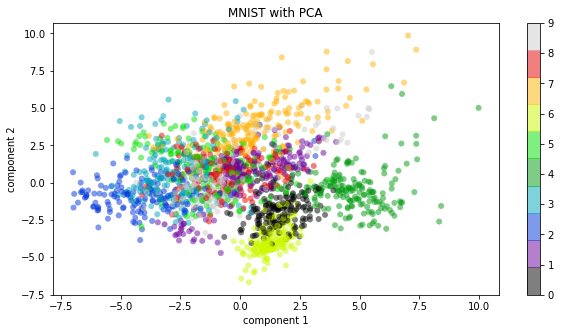

In [4]:
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.title('MNIST with PCA')

(b)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.012s...
[t-SNE] Computed neighbors for 1797 samples in 0.307s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 2.539817
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.244553
[t-SNE] Error after 300 iterations: 1.009875


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


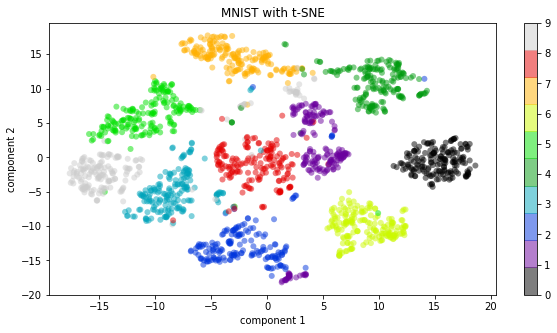

In [5]:
from sklearn.manifold import TSNE

n_sne = 7000
tsne = TSNE(n_components=2, verbose=1, perplexity=40,
            n_iter=300, random_state=0)
X_tsne = tsne.fit_transform(scaled_data)

plt.figure(figsize=(10, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.title('MNIST with t-SNE')

(c)  
t-SNE performed much better because it generated more separated clusters.

## 3

### [30 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incorporate from $1$ to $N$ components. 

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Plot the original image, and compressed versions with different levels of compression (i.e. using different numbers of the top principal components): use $k=1,5,10,25$.

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

**ANSWER**

(a)

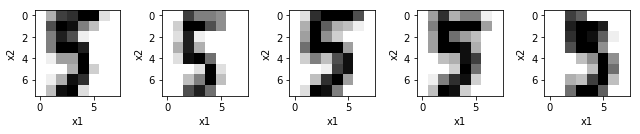

In [6]:
import numpy as np
X5=X[y==5]
fig, axes = plt.subplots(1, 5, figsize=(10,10))
for i, (image, label) in enumerate(zip(X5[:5], np.ones(5))):
    plt.subplot('15'+str(i))
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    # plot image on subplot
    plt.imshow(np.reshape(image, (8,8)), cmap='gray_r')
    plt.xlabel('x1')
    plt.ylabel('x2')


fig.tight_layout(rect=[0, 0.03, 0.9, 0.95])
plt.show()

(b)

In [7]:
scaled_data5 = scaler.fit_transform(X5)
pct_explained = []
for i in [1, 5, 10, 25]:
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(scaled_data5)
    pca_ex = pca.explained_variance_ratio_
    pct_explained.append(pca_ex)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


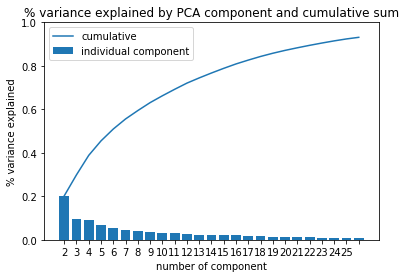

In [8]:
import pandas as pd
plt.bar(np.arange(25), pct_explained[-1], label='individual component')
plt.plot(np.cumsum(pct_explained[-1]), label='cumulative')
plt.title('% variance explained by PCA component and cumulative sum')
my_xticks = range(2, 26)
plt.xticks(np.arange(25), my_xticks)
plt.ylim(0, 1)
plt.xlabel('number of component')
plt.ylabel('% variance explained')
plt.legend()
plt.show()

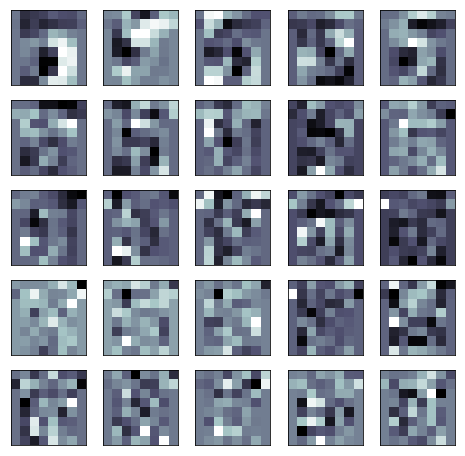

In [14]:
%matplotlib inline
pca_oliv = PCA(25)
X_proj = pca_oliv.fit_transform(scaled_data5)
fig = plt.figure(figsize=(8,8))
for i in range(25): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pca_oliv.components_[i,:], (8,8)), cmap=plt.cm.bone, interpolation='nearest') 

(c)  

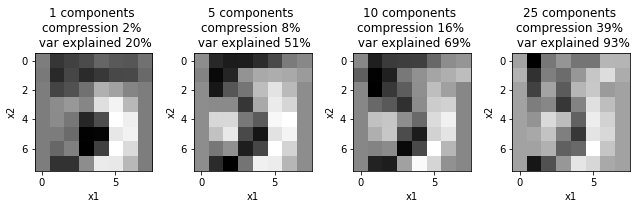

In [88]:
def compression(k):
    ratio = k/X5[0].shape[0]
    return ratio

plt.figure(figsize=(9, 9))
for idx, i in enumerate([1, 5, 10, 25]):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(scaled_data5)
    pca_ex = np.cumsum(pca.explained_variance_ratio_)[-1]
    X_inverse = pca.inverse_transform(X_pca)
    plt.subplot(1,4,idx+1)
    #choose a random sample to show
    plt.imshow(X_inverse[1].reshape(8,8), cmap='gray_r')
    plt.title('%d components \ncompression %.0f%% \n var explained %.0f%%' %(i, compression(i)*100, pca_ex*100))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.tight_layout()

(d)  
10 components could get to a decent approximation of the original data. With more components the approximation gets better but compression reduces.
With 1 components, it has compression of 2% and explained 20% of the variance
With 5 components, it has compression of 8% and explained 51% of the variance
With 10 components, it has compression of 16% and explained 69% of the variance
With 25 components, it has compression of 39% and explained 93% of the variance

## 4

### [15 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.

**(c)** Suggest at least two ways in which you neural network implementation could be improved.

**ANSWER**

In [ ]:
#forward: 30min
#sgd: 
#backpropataion 1:10-

In [22]:
# helper functions
def activation_sigmoid(x):
    return 1 / (1 + np.exp(-x))


class NN:
    '''
    Parameters
    ---------------------------------

    ---------------------------------
    pseudo code
    two input nodes, two hidden layers with five nodes each
    '''

    def __init__(self, input_nodes, hidden_nodes1, hidden_nodes2, output_nodes, learning_rate):
        self.inp_nodes = input_nodes
        self.hid_nodes1 = hidden_nodes1
        self.hid_nodes2 = hidden_nodes2
        self.out_nodes = output_nodes
        self.lr = learning_rate
        pass

    def forward_propagation(self, inp):
        # w1: weight for 1st hidden layer of size hidden_nodes1 x input_nodes
        # w2: weight for 2nd hidden layer
        # w3: weight leading to output layer
        # inp: input array
        w1 = 2*np.random.rand(self.hid_nodes1, self.inp_nodes)-1
        w2 = 2*np.random.rand(self.hid_nodes2, self.hid_nodes1)-1
        w3 = 2*np.random.rand(self.out_nodes, self.hid_nodes2)-1
        hid1 = activation_sigmoid(np.dot(w1, inp.T))
        hid2 = activation_sigmoid(np.dot(w2, hid1))
        out_activated = activation_sigmoid(np.dot(w3, hid2))
        return out_activated  # turn resultant array into a number

    def fit(self, X):
        pass

    def predict_proba(self):
        pass

    def predict(self, thres=0.5):
        pass
#         predicted_class = (self.predict_proba() >= thres).astype(int)
#         return predicted_class

In [24]:
import numpy as np
NN(2,5,5,1,0.01).forward_propagation(X_train).shape

(1, 500)

In [ ]:
#ques: where is bias term

In [ ]:
myfirstNN=NN(2,5,1,0.1)

(b)

In [5]:
from sklearn.datasets import make_moons
X_train, y_train = make_moons(n_samples=500, noise=0.20)
X_test, y_test = make_moons(n_samples=100, noise=0.20)

In [3]:
X_train.shape

(500, 2)

In [ ]:
#decision boundary on train and test
#ROC on test

(c)